In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pyunpack
!pip install patool
from pyunpack import Archive


Mounted at /content/drive
     |████████████████████████████████| 81kB 2.1MB/s 


In [ ]:
Archive('/content/drive/MyDrive/digit/data.rar').extractall('/content/data')

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def load(folder,i):
    train_data=[]
    path = os.path.join("/content/data/extracted_images/",folder)
    # print(path)
    j = 0
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path,filename),0)
        # print(os.path.join(folder,filename))
        #plt.imshow(img, cmap = "gray")
        img=~img
        # print(np.unique(img))
        #plt.imshow(img, cmap = "gray")
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            #print(len(cnt[0]))
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                #print(x,y,w,h)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            #cv2_imshow(im_resize)
            
            im_resize=np.reshape(im_resize,(784,1))

            train_data.append(im_resize)
            j = j + 1
            if j == i:
              break
            
    return train_data

In [ ]:
data = []
data_folder = ["0","1","2","3","4","5","6","7","8","9","+","-"]
data_i = ["0","1"]
# 0 == 0
# 1 == 1
# 2 == 2
# 3 == 3
# 4 == 4
# 5 == 5
# 6 == 6
# 7 == 7
# 8 == 8
# 9 == 9
# + == 10
# - == 11
# x(times) == 12
# /,div == 13
# y == 14
# z == 15

In [ ]:
data=load("+",2500)
for i in range(0,2500):
    data[i]=np.append(data[i],['10'])
print(len(data))
print(data[0].shape)


2500
(785,)


In [ ]:
data_1=load("-",2500)
for i in range(0,2500):
    data_1[i]=np.append(data_1[i],['11'])
data=np.concatenate((data,data_1))    
print(len(data))

5000


In [ ]:
data_2=load("0",2500)
for i in range(0,2500):
    data_2[i]=np.append(data_2[i],['0'])
data=np.concatenate((data,data_2))        
print(len(data))

7500


In [ ]:
data_3=load("1",2500)
for i in range(0,2500):
    data_3[i]=np.append(data_3[i],['1'])
data=np.concatenate((data,data_3))        
print(len(data))

10000


In [ ]:
data_4=load("2",2500)
for i in range(0,2500):
    data_4[i]=np.append(data_4[i],['2'])
data=np.concatenate((data,data_4))        
print(len(data))

12500


In [ ]:
data_5=load("3",2500)
for i in range(0,2500):
    data_5[i]=np.append(data_5[i],['3'])
data=np.concatenate((data,data_5))        
print(len(data))

15000


In [ ]:
data_6=load("4",2500)
for i in range(0,2500):
    data_6[i]=np.append(data_6[i],['4'])
data=np.concatenate((data,data_6))        
print(len(data))

17500


In [ ]:
data_7=load("5",2500)
for i in range(0,2500):
    data_7[i]=np.append(data_7[i],['5'])
data=np.concatenate((data,data_7))        
print(len(data))

20000


In [ ]:
data_8=load("6",2500)
for i in range(0,2500):
    data_8[i]=np.append(data_8[i],['6'])
data=np.concatenate((data,data_8))        
print(len(data))

22500


In [ ]:
data_9=load("7",2500)
for i in range(0,2500):
    data_9[i]=np.append(data_9[i],['7'])
data=np.concatenate((data,data_9))        
print(len(data))

25000


In [ ]:
data_10=load("8",2500)
for i in range(0,2500):
    data_10[i]=np.append(data_10[i],['8'])
data=np.concatenate((data,data_10))        
print(len(data))

27500


In [ ]:
data_11=load("9",2500)
for i in range(0,2500):
    data_11[i]=np.append(data_11[i],['9'])
data=np.concatenate((data,data_11))        
print(len(data))

30000


In [ ]:
data_12=load("times",2500)
for i in range(0,2500):
    data_12[i]=np.append(data_12[i],['12'])
data=np.concatenate((data,data_12))        
print(len(data))

32500


In [ ]:
data_13=load("div",800)
for i in range(0,800):
    data_13[i]=np.append(data_13[i],['13'])
data=np.concatenate((data,data_13))        
print(len(data))

33300


In [ ]:
data_14=load("y",2500)
for i in range(0,2500):
    data_14[i]=np.append(data_14[i],['14'])
data=np.concatenate((data,data_14))        
print(len(data))

35800


In [ ]:
data_15=load("z",2500)
for i in range(0,2500):
    data_15[i]=np.append(data_15[i],['15'])
data=np.concatenate((data,data_15))        
print(len(data))

38300


In [ ]:
df=pd.DataFrame(data,index=None)
df.to_csv('final.csv',index=False)

In [ ]:
data = pd.read_csv("/content/final.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,0,0,0,0,0,0,0,0,0,0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,0,0,0,77,151,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,21,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,3,220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,141,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,0,27,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64300 entries, 0 to 64299
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 385.1 MB


In [ ]:
data.iloc[:,-1].unique()

array([10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 14, 15])

In [ ]:
eval(str(10+4+5))

19

(45, 45)


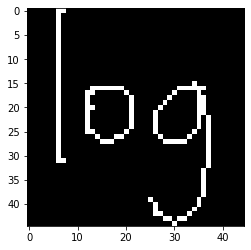

In [ ]:
path_tan='/content/data/extracted_images/log/exp10226.jpg'
log = cv2.imread(path_tan, 0)
print(log.shape)
ret_log,thresh_log = cv2.threshold(log,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh_log,cmap='gray')

In [ ]:
contours3, hierarchy3 = cv2.findContours(thresh_log, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours3))
print(hierarchy3)

3
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


In [ ]:
newthresh=thresh_log.copy()
newthresh2=thresh_log.copy()
newthresh3=thresh_log.copy()
newthresh4=thresh_log.copy()

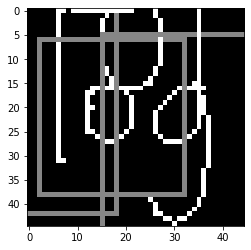

In [ ]:
for i,count in enumerate(contours3):
  x,y,w,h=cv2.boundingRect(count)
  cv2.rectangle(newthresh4,(x-10,y-10),(x+w+10,y+h+10),(134,80,200),1)
  cv2.putText(newthresh4,str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,255,255),1)
plt.imshow(newthresh4,cmap='gray')